Detecting anomalies with gaussian mixture models

In [1]:
from anomaly_detection import detect_anomaly, synthetic_data
import numpy as np

In [2]:
#!pip list

In [25]:
import os
os.getcwd()

'/home/kpapdac/code-server2.1698-vsc1.41.1-linux-x86_64'

In [11]:
n_cluster = 3
n_features = 4
mean = np.array([[0,2,-1],[-1,0,1],[1,-2,0],[-1,0,1]])
cov = np.repeat([0.01*np.ones([n_features, n_features])], n_cluster) \
    .reshape(n_features,n_features,n_cluster)


synth_data = synthetic_data.generateClusters(n_cluster, mean, cov, n_features)
X,y = synth_data.generate_data()

In [3]:
X.shape

(100, 4, 3)

In [13]:
X,y = synth_data.generate_data()

In [15]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=n_cluster, covariance_type="full")
gmm.fit(X[:,:,0])

GaussianMixture(n_components=3)

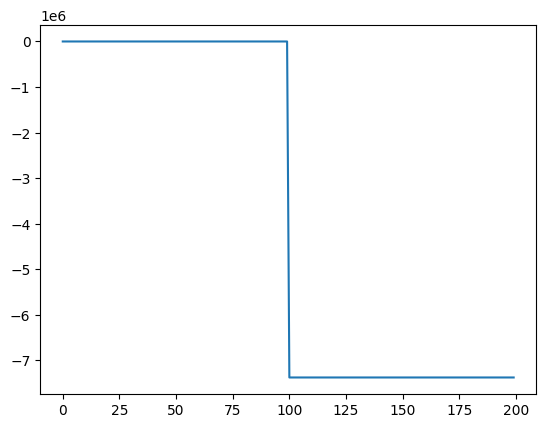

In [24]:
import matplotlib.pyplot as plt
new_withanomaly = np.concatenate([X[:,:,0],X[:,:,1]])
new_withanomaly.shape
plt.plot(gmm.score_samples(new_withanomaly))